# # Outlier Removal Code

This is where the outlier prices are removed. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
%config InlineBackend.figure_format='retina'

In [17]:
df=pd.read_csv('datasurabaya.csv')
df.head()

,make,model,year,amount,fuel_fix,transmission_fix,capacity,MMTTY
0,honda,jazz,2013,1.0,Bensin,Automatic,1.5,honda jazz Automatic 1.5 Bensin 2013
1,toyota,yaris,2016,1.0,Bensin,Automatic,1.5,toyota yaris Automatic 1.5 Bensin 2016
2,toyota,sienta,2016,1.0,Bensin,Manual,1.5,toyota sienta Manual 1.5 Bensin 2016
3,toyota,yaris,2015,1.0,Bensin,Automatic,1.5,toyota yaris Automatic 1.5 Bensin 2015
4,daihatsu,luxio,2013,115.0,Bensin,Manual,1.5,daihatsu luxio Manual 1.5 Bensin 2013


In [18]:
print(df['make'].head())
#print(df['amount'].head())
df['MMTTY']=df['MMTTY'].map(str)

0       honda
1      toyota
2      toyota
3      toyota
4    daihatsu
Name: make, dtype: object


In [19]:
df.head()

,make,model,year,amount,fuel_fix,transmission_fix,capacity,MMTTY
0,honda,jazz,2013,1.0,Bensin,Automatic,1.5,honda jazz Automatic 1.5 Bensin 2013
1,toyota,yaris,2016,1.0,Bensin,Automatic,1.5,toyota yaris Automatic 1.5 Bensin 2016
2,toyota,sienta,2016,1.0,Bensin,Manual,1.5,toyota sienta Manual 1.5 Bensin 2016
3,toyota,yaris,2015,1.0,Bensin,Automatic,1.5,toyota yaris Automatic 1.5 Bensin 2015
4,daihatsu,luxio,2013,115.0,Bensin,Manual,1.5,daihatsu luxio Manual 1.5 Bensin 2013


In [20]:
df['amount'].head()

0      1.0
1      1.0
2      1.0
3      1.0
4    115.0
Name: amount, dtype: float64

In [22]:
grouped=df.groupby('MMTTY')

In [23]:
statBefore = pd.DataFrame({'q1': grouped['amount'].quantile(.25), \
'median': grouped['amount'].median(), 'q3' : grouped['amount'].quantile(.75)})

In [24]:
statBefore.head()

,q1,median,q3
MMTTY,,,
audi a4 Automatic 1.8 Bensin 2010,1.990000e+08,1.990000e+08,1.990000e+08
audi a4 Automatic 1.8 Bensin 2013,2.800000e+08,2.800000e+08,2.800000e+08
audi r8 Automatic 4.2 Bensin 2012,2.150000e+09,2.150000e+09,2.150000e+09
audi tt Automatic 2.0 Bensin 2009,5.450000e+08,5.450000e+08,5.450000e+08
audi tt Manual 1.8 Bensin 2001,1.900000e+08,1.900000e+08,1.900000e+08


In [25]:
def is_outlier(row):
    iq_range = statBefore.loc[row.MMTTY]['q3'] - statBefore.loc[row.MMTTY]['q1']
    q3 = statBefore.loc[row.MMTTY]['q3']
    q1 = statBefore.loc[row.MMTTY]['q1']
    if row.amount > (q3 + (0.8* iq_range)) or row.amount < (q1 - (0.8* iq_range)):
        return True
    else:
        return False
#apply the function to the original df:
df.loc[:, 'outlier'] = df.apply(is_outlier, axis = 1)
#filter to only non-outliers:
df_no_outliers = df[~(df.outlier)]

In [26]:
df_no_outliers.head()

,make,model,year,amount,fuel_fix,transmission_fix,capacity,MMTTY,outlier
7,daihatsu,terios,2018,210.0,Bensin,Automatic,1.5,daihatsu terios Automatic 1.5 Bensin 2018,False
9,holden,gemini,1990,7000000.0,Solar,Manual,1.8,holden gemini Manual 1.8 Solar 1990,False
10,holden,gemini,1990,7000000.0,Solar,Manual,1.8,holden gemini Manual 1.8 Solar 1990,False
11,mazda,323,1986,13000000.0,Bensin,Manual,1.3,mazda 323 Manual 1.3 Bensin 1986,False
14,daihatsu,zebra,1988,16000000.0,Bensin,Manual,1.3,daihatsu zebra Manual 1.3 Bensin 1988,False


Text(0.5, 1.0, 'Boxplot')

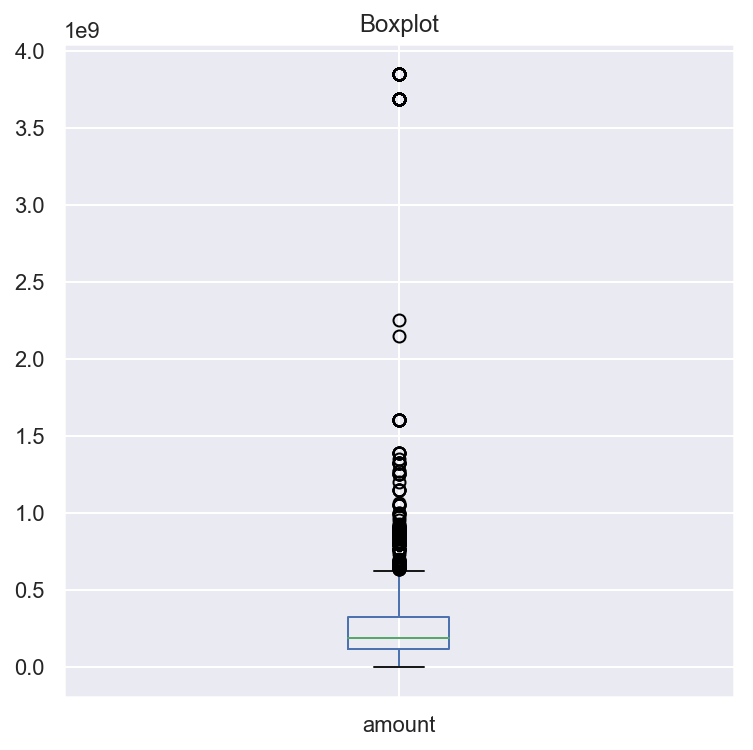

In [28]:
ax = df_no_outliers.amount.plot(kind='box',figsize=(6,6))
ax.set_title('Boxplot')

In [29]:
df.to_csv("Surabaya-scraping.csv")